In [1]:
import matplotlib.pyplot as plt
import arviz as az
import models
import utils
from sklearn.metrics import mean_squared_error

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<Axes: title={'center': 'MMM test data'}, xlabel='start_of_week'>

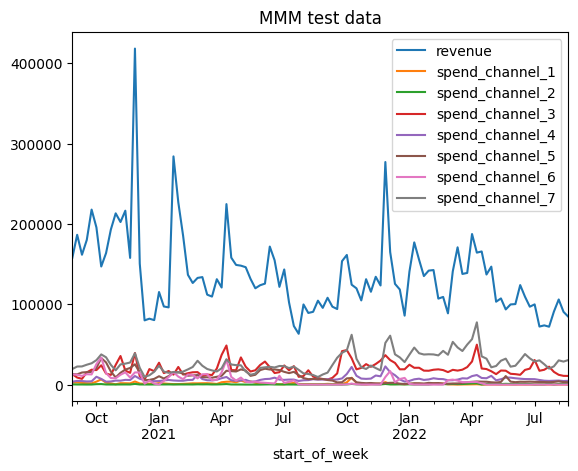

In [2]:
media = utils.load_media()
utils.plot_media(media)

In [3]:
baseline = models.create_baseline_mmm(media)
baseline_prior_prediction = models.prior_predictive(baseline)
mmm = models.create_mmm(media)
mmm_prior_prediction = models.prior_predictive(mmm)

predichtion_data = {
    "baseline": baseline_prior_prediction,
    "mmm": mmm_prior_prediction
}


Sampling: [coefficient_spend_channel_1, coefficient_spend_channel_2, coefficient_spend_channel_3, coefficient_spend_channel_4, coefficient_spend_channel_5, coefficient_spend_channel_6, coefficient_spend_channel_7, revenue, sigma]
Sampling: [alpha_spend_channel_1, alpha_spend_channel_2, alpha_spend_channel_3, alpha_spend_channel_4, alpha_spend_channel_5, alpha_spend_channel_6, alpha_spend_channel_7, black_friday_coef, capacity_coef, coefficient_spend_channel_1, coefficient_spend_channel_2, coefficient_spend_channel_3, coefficient_spend_channel_4, coefficient_spend_channel_5, coefficient_spend_channel_6, coefficient_spend_channel_7, cos_coef, growth_rate, revenue, sigma, sin_coef, theta_spend_channel_1, theta_spend_channel_2, theta_spend_channel_3, theta_spend_channel_4, theta_spend_channel_5, theta_spend_channel_6, theta_spend_channel_7, year_coeff]


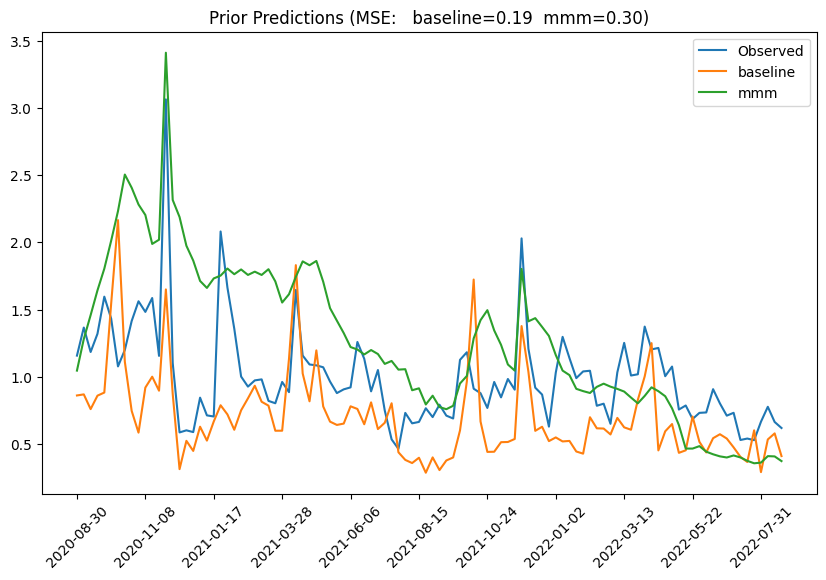

In [4]:
utils.plot_predictions(media, predichtion_data, title="Prior Predictions")


In [5]:
baseline_trace, baseline_posterior_predictions = models.posterior_predictive(baseline)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [coefficient_spend_channel_1, coefficient_spend_channel_2, coefficient_spend_channel_3, coefficient_spend_channel_4, coefficient_spend_channel_5, coefficient_spend_channel_6, coefficient_spend_channel_7, sigma]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 5 seconds.
Sampling: [revenue]


Output()

In [6]:
mmm_trace, mmm_posterior_predictions = models.posterior_predictive(mmm)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [alpha_spend_channel_1, coefficient_spend_channel_1, alpha_spend_channel_2, coefficient_spend_channel_2, alpha_spend_channel_3, coefficient_spend_channel_3, alpha_spend_channel_4, coefficient_spend_channel_4, alpha_spend_channel_5, coefficient_spend_channel_5, alpha_spend_channel_6, coefficient_spend_channel_6, alpha_spend_channel_7, coefficient_spend_channel_7, capacity_coef, growth_rate, cos_coef, sin_coef, year_coeff, black_friday_coef, sigma]
>CompoundStep
>>Metropolis: [theta_spend_channel_1]
>>Metropolis: [theta_spend_channel_2]
>>Metropolis: [theta_spend_channel_3]
>>Metropolis: [theta_spend_channel_4]
>>Metropolis: [theta_spend_channel_5]
>>Metropolis: [theta_spend_channel_6]
>>Metropolis: [theta_spend_channel_7]


Output()

Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 71 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [revenue]


Output()

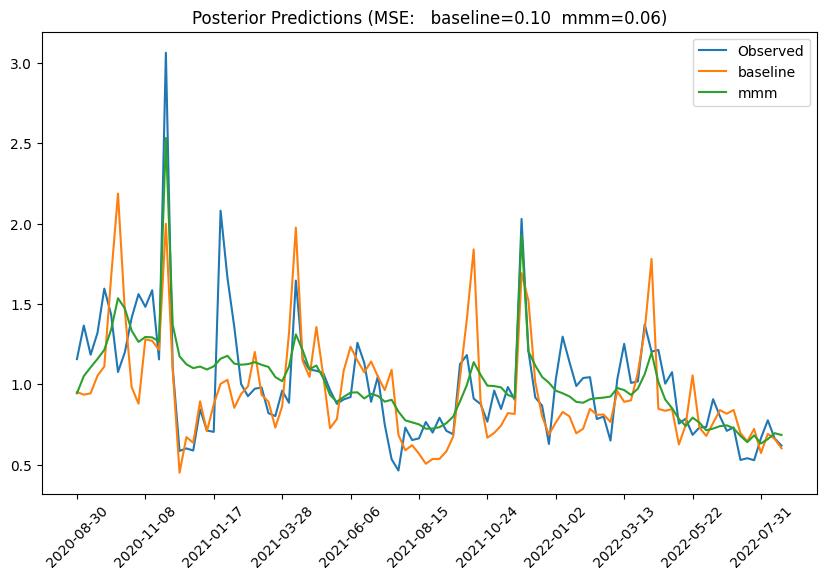

In [9]:
posterior_prediction_data = {
    "baseline": baseline_posterior_predictions,
    "mmm": mmm_posterior_predictions
}
utils.plot_predictions(media, posterior_prediction_data, f'Posterior Predictions')

In [10]:
df_comp_loo = az.compare({"baseline": baseline_trace, "mmm": mmm_trace})
df_comp_loo.to_latex("report/loo.tex")

/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/pmengers/Documents/private/haensel-ams/.venv/lib/python3.10/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_s

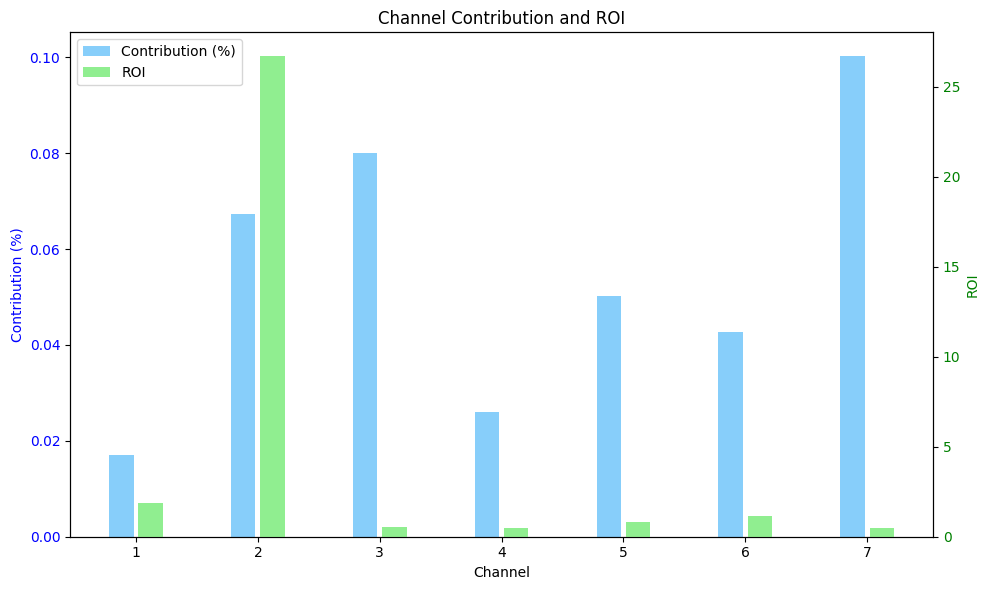

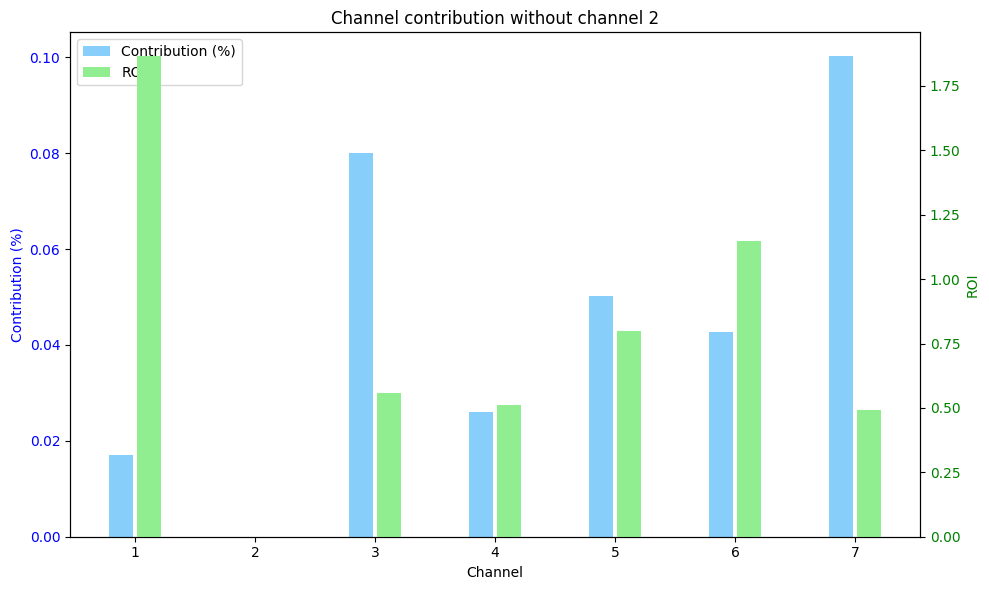

In [11]:
summary = az.summary(mmm_trace, round_to=2)
channel_contributions = utils.calc_channel_contribution(summary, media)
utils.plot_roi_contribution(channel_contributions)
channel_contributions_2 = channel_contributions.drop('2')
utils.plot_roi_contribution(channel_contributions_2, title='Channel contribution without channel 2')